In [1]:
import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

plt.show()

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Data Preparation

#### Data Cleaning 

In [2]:
# Opening the csv file

df = pd.read_csv(r'dataset.csv')

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [3]:
# Get Data information

df.info(max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Get Data shape 

shape = df.shape 

print(f'The Dataset has {shape[0]} Rows and {shape[1]} Columns')

The Dataset has 1470 Rows and 35 Columns


In [5]:
# Check for Empty cells

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Check for Null Values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Check for Duplicates

df.duplicated().sum()

np.int64(0)

In [8]:
# Get the Value Count of each Column

df.nunique().sort_values()


EmployeeCount                  1
Over18                         1
StandardHours                  1
Attrition                      2
OverTime                       2
PerformanceRating              2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
StockOptionLevel               4
JobSatisfaction                4
EnvironmentSatisfaction        4
JobInvolvement                 4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

#### Data Categorization

In [9]:
# Check for Numerical Columns 

numerical_cols = df.select_dtypes(include = 'int').columns.tolist()

print(str( len(numerical_cols) ) + ' Numerical Columns \n \n' + str(numerical_cols) )

26 Numerical Columns 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Check for Categorical Columns

categorical_cols = df.select_dtypes( include = ['object', 'float'] ).columns.tolist()

print(str( len(categorical_cols) ) + ' Categorical Columns \n \n' + str(categorical_cols) )

9 Categorical Columns 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [11]:
# Get redundant columns

redundant_cols = []

for col in df.columns.tolist() :
     if df[col].nunique() == 1 :
        redundant_cols.append(col)
        
redundant_cols

['EmployeeCount', 'Over18', 'StandardHours']

In [12]:
# Remove redundancy

df.drop(columns = redundant_cols, inplace = True)

df.head(2)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [13]:
# Updated dataset size 

shape = df.shape 

print(f'The Dataset now has {shape[0]} Rows and {shape[1]} Columns after removing Redundancies')

The Dataset now has 1470 Rows and 32 Columns after removing Redundancies


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### Exploratory Data Analysis

#### General Correlation Analysis

In [15]:
# Copy and Encode df 

df_copy = df.copy()

for col in categorical_cols:
    if col not in redundant_cols:
        df_copy[col] = LabelEncoder().fit_transform(df_copy[col])
    
df_copy.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


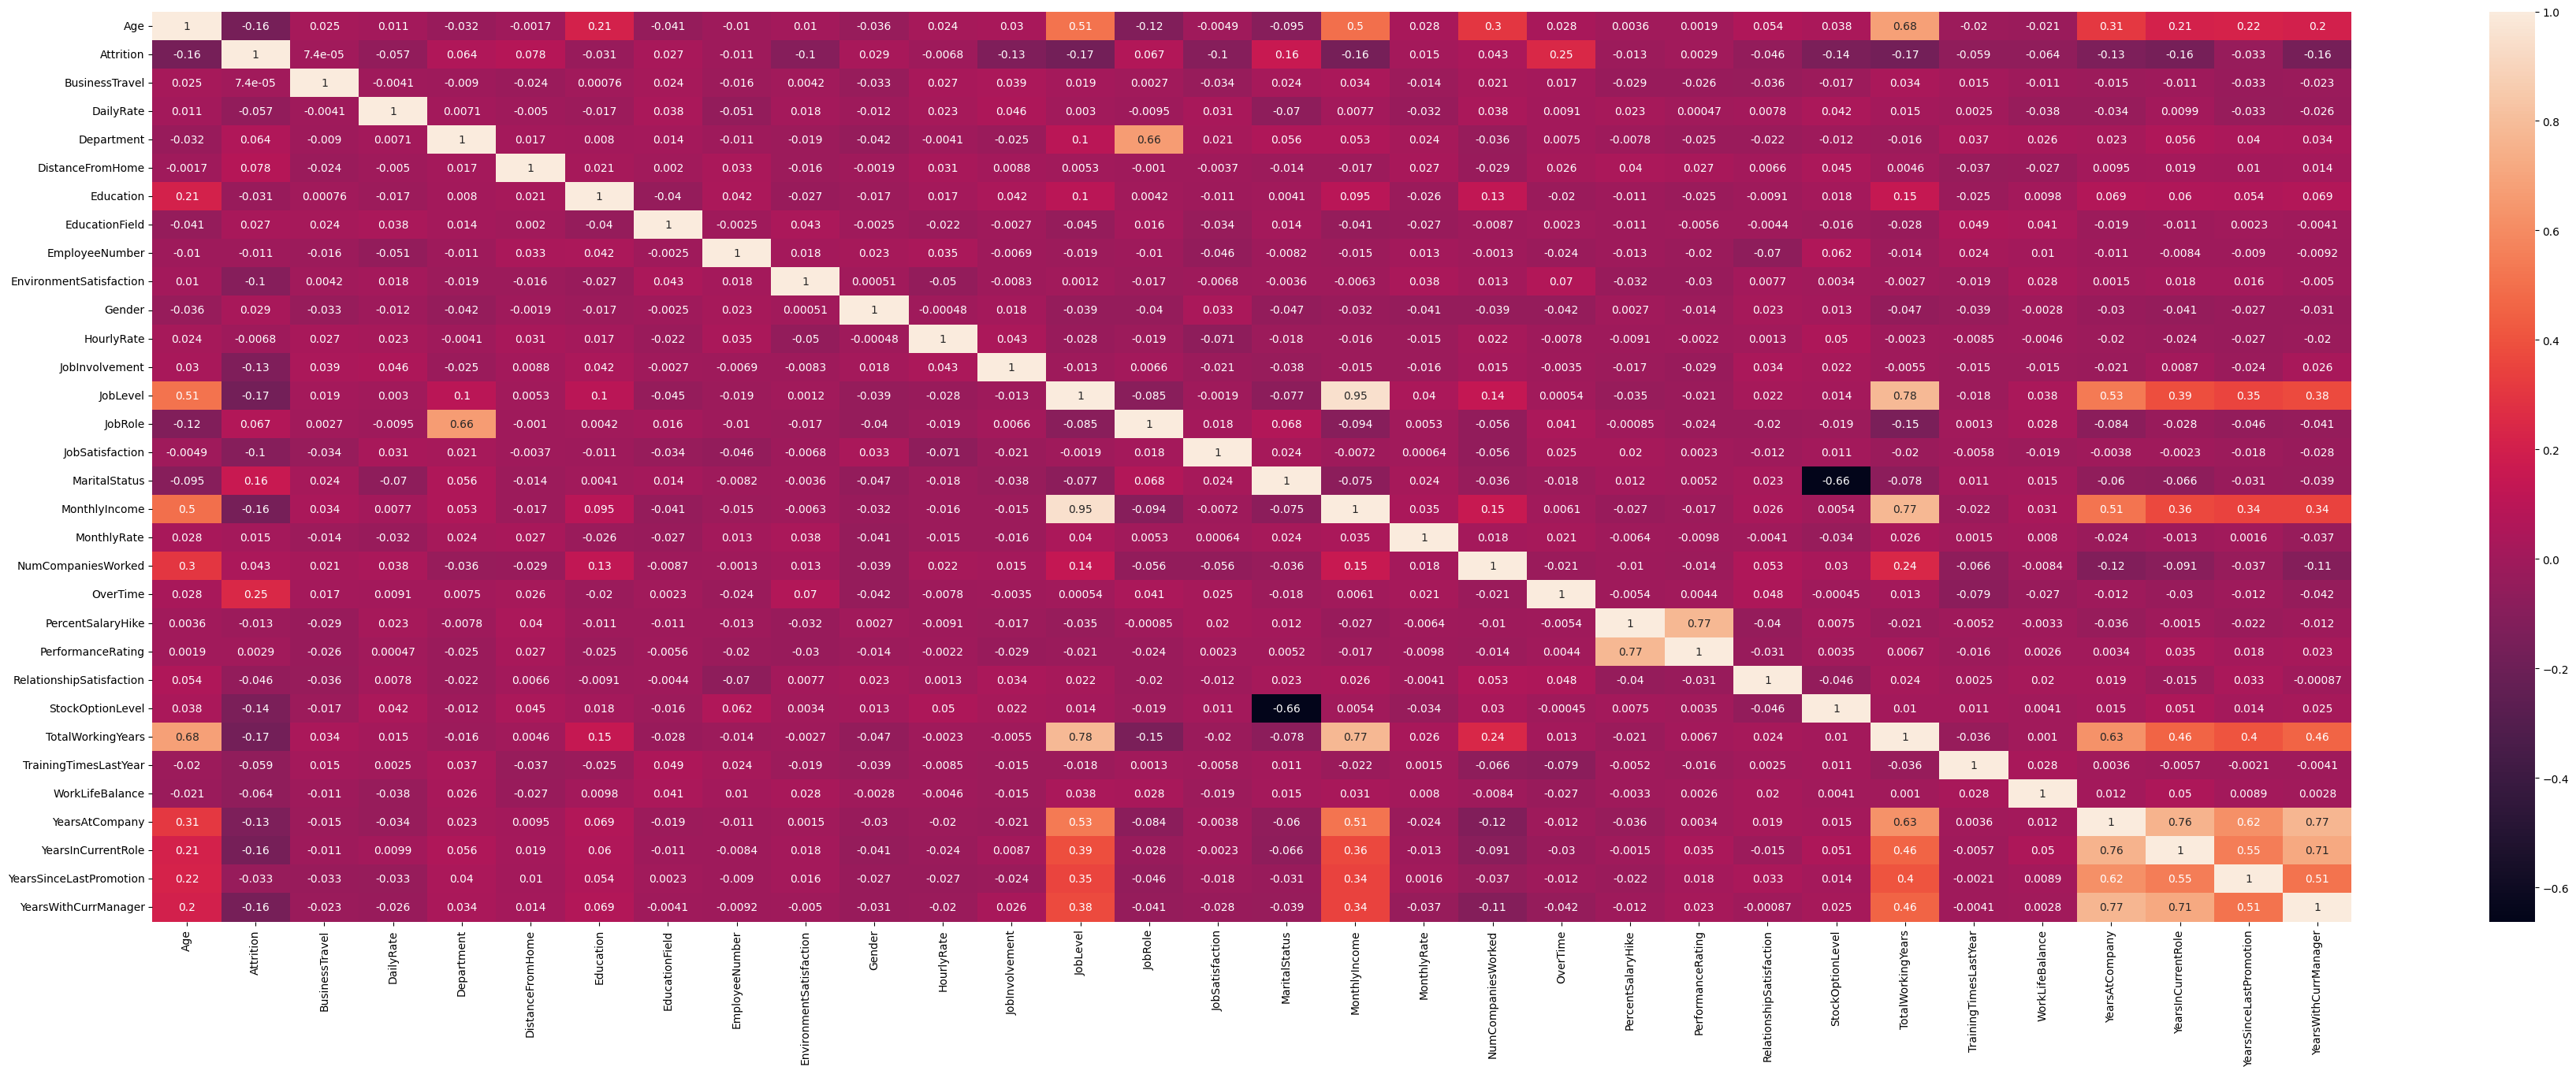

In [16]:
# Plot a correlation chart of df features 

df_encoded_corr = df_copy.corr()

plt.figure(figsize = (45, 15))

sns.heatmap(df_encoded_corr, annot = True)

plt.show()

In [17]:
# List out the correlation of each feature with Attrition

df_corr_list = df_encoded_corr['Attrition'].sort_values(ascending = True ).reset_index()

df_corr_list

,index,Attrition
0,TotalWorkingYears,-0.171063
1,JobLevel,-0.169105
2,YearsInCurrentRole,-0.160545
3,MonthlyIncome,-0.159840
4,Age,-0.159205
5,YearsWithCurrManager,-0.156199
6,StockOptionLevel,-0.137145
7,YearsAtCompany,-0.134392
8,JobInvolvement,-0.130016
9,JobSatisfaction,-0.103481


 From the `Correlation Chart of df`, it is evident that individually, none of the features correlate highly with the target `Attrition` 

#### Age 

In [18]:
df['Age'].value_counts().reset_index()

,Age,count
0,35,78
1,34,77
2,36,69
3,31,69
4,29,68
5,32,61
6,30,60
7,38,58
8,33,58
9,40,57


##### Univariate Analysis

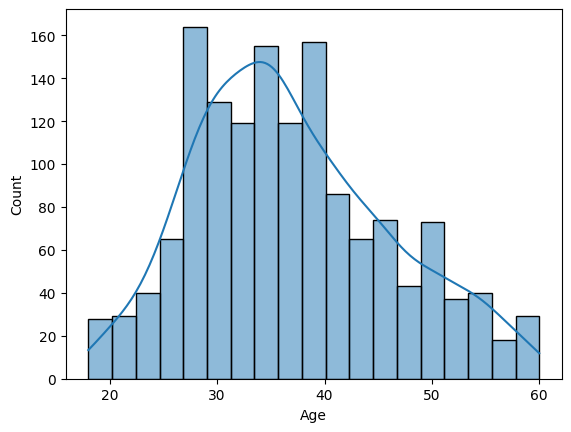

In [19]:
sns.histplot(data = df, x = 'Age', kde=True)


plt.show()

##### Bivariate Analysis

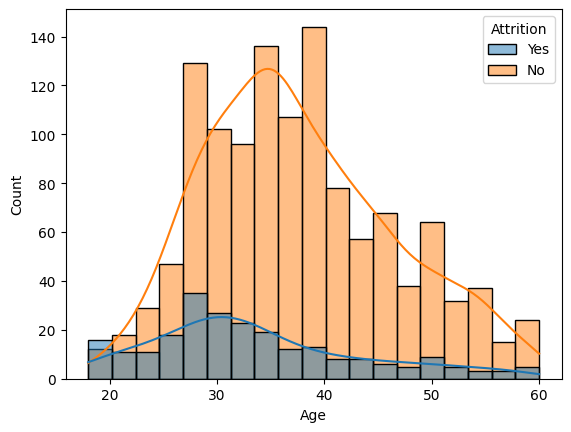

In [20]:

sns.histplot(data = df, x = 'Age', hue ='Attrition', kde=True)


plt.show()

In [21]:
Age_group = pd.cut(df['Age'], bins = [18, 20, 30, 40, 50, 60 ], labels = ['18 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60'])

Age_group

0       41 - 50
1       41 - 50
2       31 - 40
3       31 - 40
4       21 - 30
         ...   
1465    31 - 40
1466    31 - 40
1467    21 - 30
1468    41 - 50
1469    31 - 40
Name: Age, Length: 1470, dtype: category
Categories (5, object): ['18 - 20' < '21 - 30' < '31 - 40' < '41 - 50' < '51 - 60']

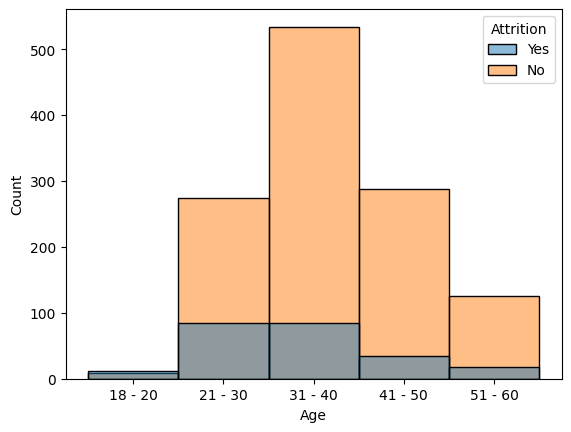

In [22]:
sns.histplot(data = df, x = Age_group, hue = 'Attrition')

plt.show()

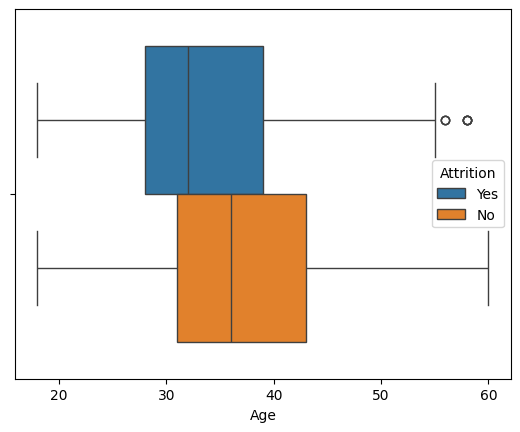

In [23]:
sns.boxplot(data = df, x = 'Age', hue ='Attrition')

plt.show()

What would make younger employees want to quit



#### Business Travel

In [24]:
Business_Travel = df['BusinessTravel'].value_counts()

Business_Travel.reset_index()

,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


##### Univariate Analysis : Distribution of Business Travel

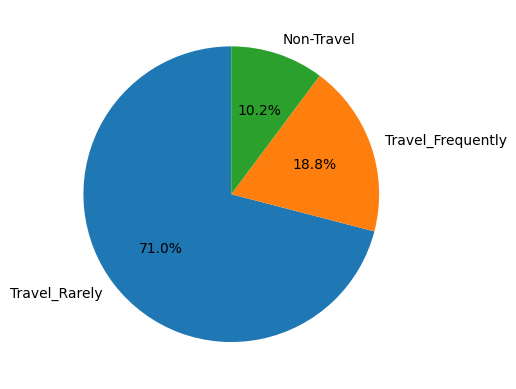

In [25]:
# Distribution of Business Travel categories 


plt.pie(Business_Travel, labels = Business_Travel.index, autopct='%1.1f%%', startangle=90)

plt.show()

##### Bivariate Analysis : Business Travel X Attrition

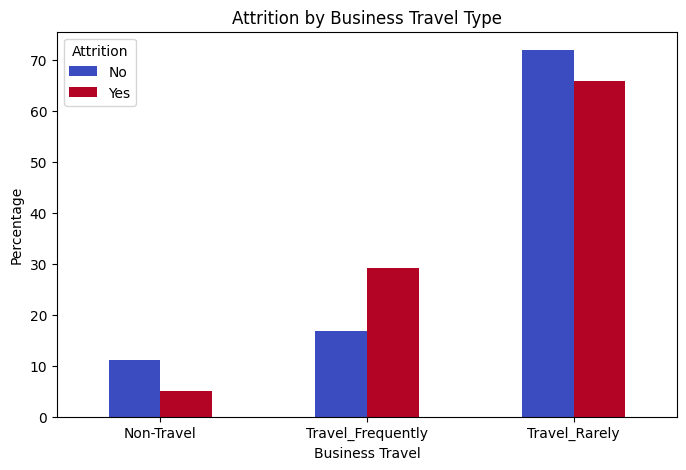

In [26]:
BT_Attrition = df.pivot_table(
    index='Attrition',
    columns='BusinessTravel',
    values='EmployeeNumber',  # any numeric column just to count
    aggfunc='count',
    fill_value=0
)

BT_Attrition_pct = BT_Attrition.div(BT_Attrition.sum(axis=1), axis=0) * 100


BT_Attrition_pct.T.plot(kind='bar',figsize=(8,5), colormap='coolwarm')
plt.title('Attrition by Business Travel Type')
plt.xticks(rotation=360)
plt.ylabel('Percentage')
plt.xlabel('Business Travel')
plt.show()


Generally, most employees `Rarely Travel`. 
Amongst those that ` Do Not Travel `, the numbers of employees who decided to stay is dominant. 
Amongst the employees that `Travel Frequently` , the attrition rate is higher.

In [27]:
# sns.catplot(data=df, x='OverTime', y='JobSatisfaction', hue='Attrition', col='Department', kind='box')


#### Department

##### Univariate Analysis : Distribution of Department

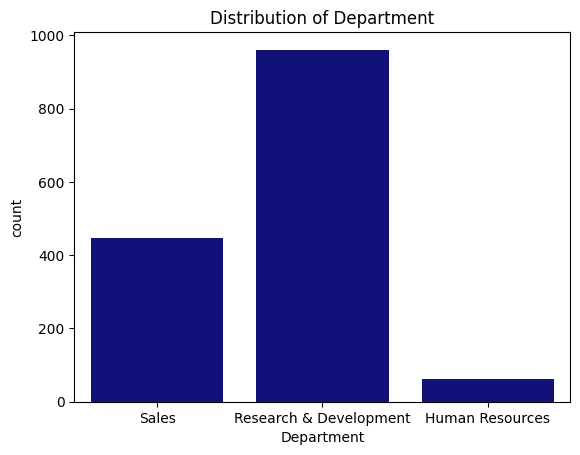


Department Counts: 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [28]:
sns.countplot(data=df, x='Department', color='Darkblue')
plt.title('Distribution of Department')
plt.show()

print("\nDepartment Counts: \n")
print(df['Department'].value_counts())

##### Bivariate Analysis : Department X Attrition.


Department vs Attrition (%): 

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


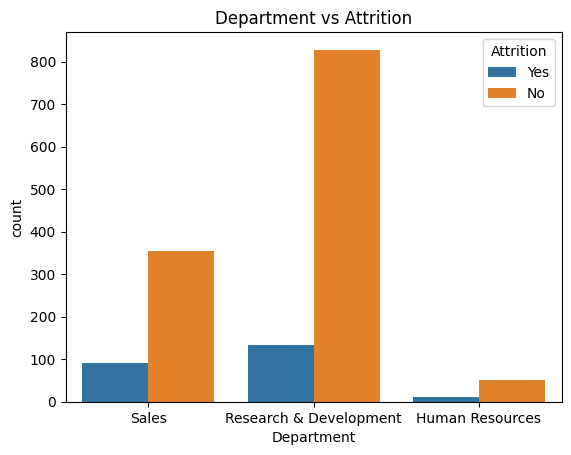

In [29]:
Dept_Attr = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print("\nDepartment vs Attrition (%): \n")
print(Dept_Attr)

sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Department vs Attrition')
plt.show()


In [30]:
df['DistanceFromHome'].value_counts().reset_index()

,DistanceFromHome,count
0,2,211
1,1,208
2,10,86
3,9,85
4,3,84
5,7,84
6,8,80
7,5,65
8,4,64
9,6,59


#### Education

In [31]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

##### Univariate Analysis

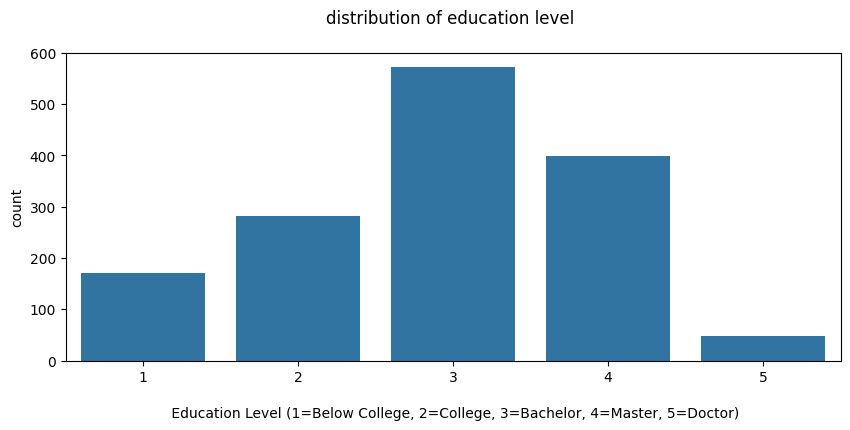

In [32]:
plt.figure(figsize = (10, 4))
sns.countplot(x=df['Education'])
plt.title('distribution of education level \n')
plt.xlabel("\n Education Level (1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor)")
plt.show()

##### Bivariate Analysis

In [33]:
pd.crosstab(df['Education'], df['Attrition'])

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


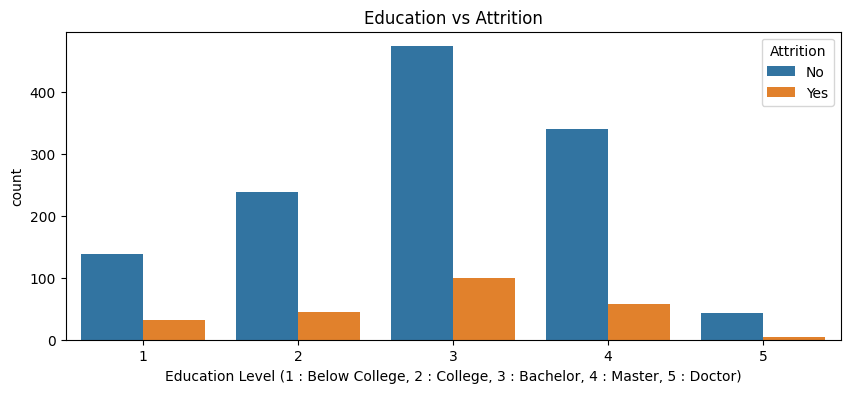


Education vs Attrition (%): 

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [34]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Education vs Attrition")
plt.xlabel("Education Level (1 : Below College, 2 : College, 3 : Bachelor, 4 : Master, 5 : Doctor)")
plt.ylabel("count")
plt.show()

Education_attr = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print("\nEducation vs Attrition (%): \n")
print(Education_attr)

#### Job Involvement

In [35]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

##### Univariate Analysis

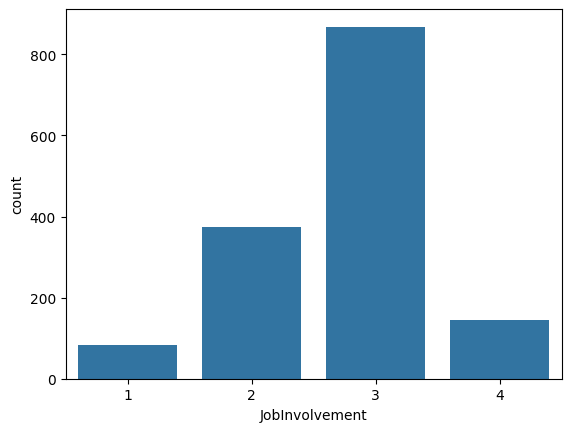

In [36]:
sns.countplot(data = df, x = 'JobInvolvement')

plt.show()

##### Bivariate Analysis

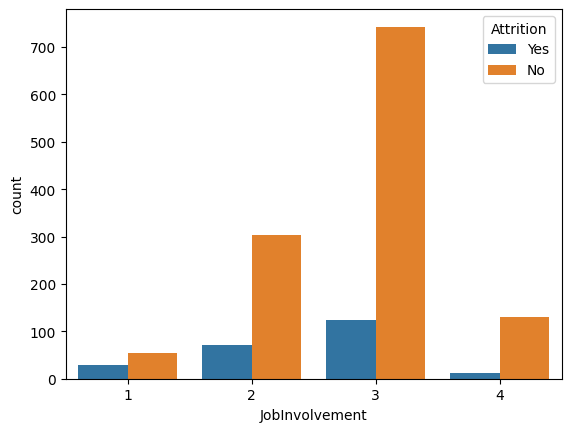

In [37]:
sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')

plt.show()

#### Gender

In [38]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

##### Univariate Analysis

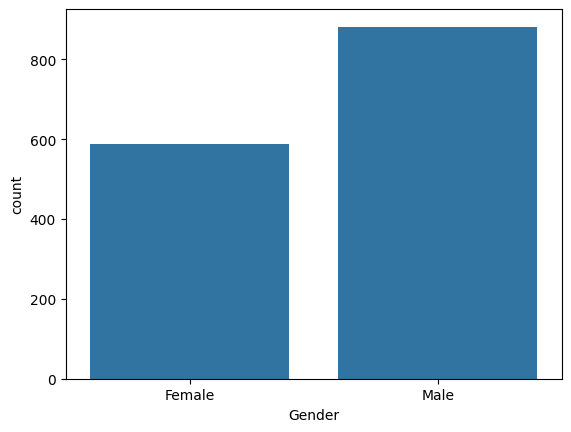

In [39]:
sns.countplot(data = df, x = 'Gender')

plt.show()

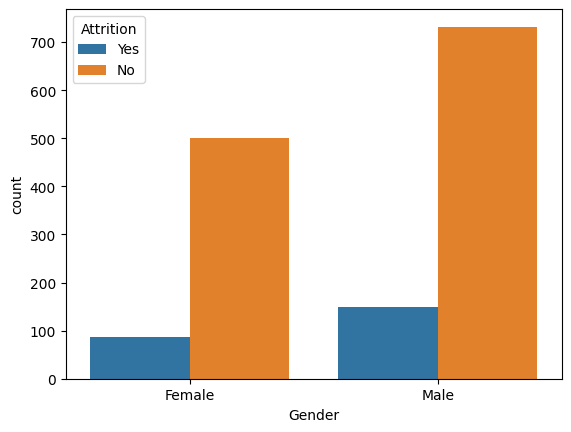

In [40]:
sns.countplot(data = df, x = 'Gender', hue = 'Attrition')

plt.show()

#### Total Working Years

In [41]:
df['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

##### Univariate Analysis 


Univariate Analysis: TotalWorkingYears
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


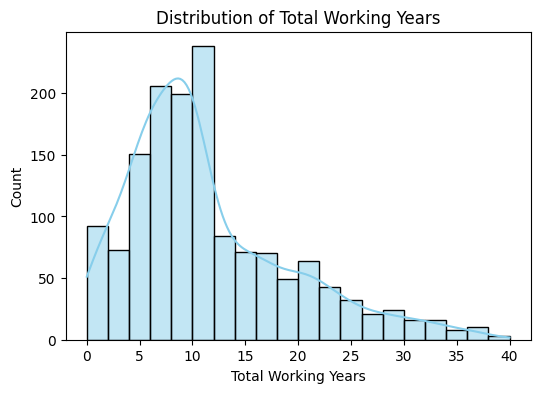

In [42]:
print("\nUnivariate Analysis: TotalWorkingYears")
print(df['TotalWorkingYears'].describe())

plt.figure(figsize=(6,4))
sns.histplot(df['TotalWorkingYears'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Working Years")
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.show()

#####  Bivariate Analysis

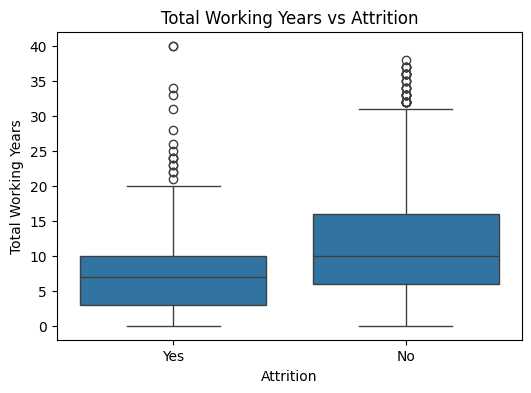

Average Total Working Years by Attrition:
Attrition
No     11.862936
Yes     8.244726
Name: TotalWorkingYears, dtype: float64
----------------------------------------


In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Total Working Years vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()


print("Average Total Working Years by Attrition:")
print(df.groupby('Attrition')['TotalWorkingYears'].mean())
print("-"*40)

#### Work-Life Balance

In [44]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

#####  Univariate Analysis


Univariate Analysis: WorkLifeBalance 

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


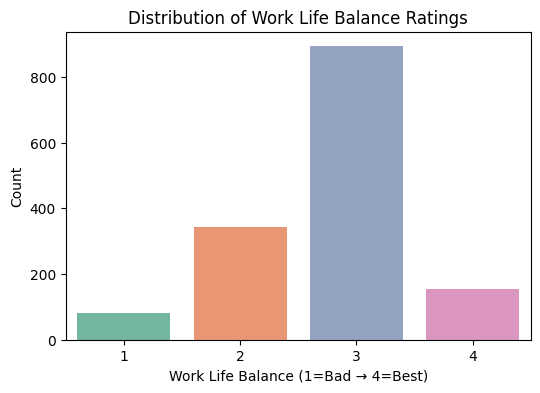

In [45]:
print("\nUnivariate Analysis: WorkLifeBalance \n")
print(df['WorkLifeBalance'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')
plt.title("Distribution of Work Life Balance Ratings")
plt.xlabel("Work Life Balance (1=Bad → 4=Best)")
plt.ylabel("Count")
plt.show()


##### Bivariate Analysis

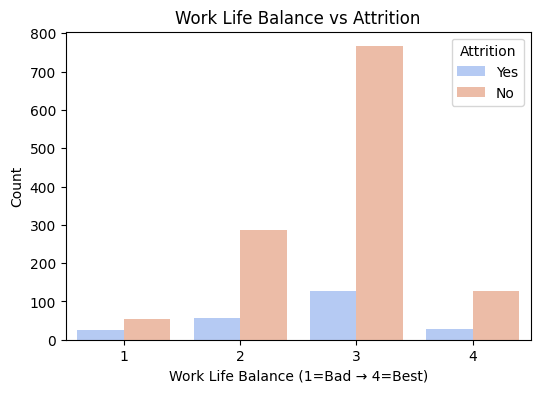

Attrition Percentage by WorkLifeBalance (%): 

Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='coolwarm')
plt.title("Work Life Balance vs Attrition")
plt.xlabel("Work Life Balance (1=Bad → 4=Best)")
plt.ylabel("Count")
plt.show()

# Percentage attrition by WorkLifeBalance
wlb_attr = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index') * 100
print("Attrition Percentage by WorkLifeBalance (%): \n")
print(wlb_attr)

### Multivariate Analysis

In [47]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='JobSatisfaction'>

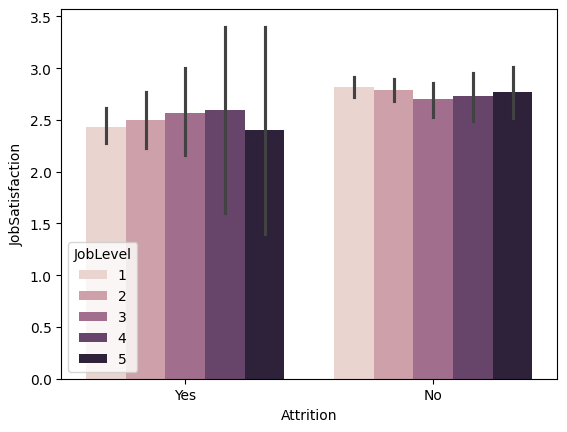

In [85]:
sns.barplot(y='JobSatisfaction', x='Attrition', hue='JobLevel', data=df)


- Attrition by Age and Years at Company 
- Attrition by Job level and Job satisfaction
- Attrition By Overtime and Job Satisfaction
- Attrition By Work-Life Balance and Job Satisfaction
- Attrition By Gender and Marital Status
- Attrition By Business Travel and Marital Status 
- Attrition By Percent Salary Hike and Years at company
- Attrition By Years In current Role and Years Since Last promotion
- Attrition By Numbers of companies worked and Total Working Years
- Attrition By Job Role and Job satisfaction
- Attrition By Job Involvement and Job satisfaction
- Attrition By Job Level and Years at Company
- Attrition By Performance Rating and Job Involvement
- 

### Feature Engineering

#### Feature Addition

In [48]:
# Add DEBT Feature
# Add debt to rows where Monthly Rate is higher than Monthly Income

df['Debt'] = np.where(
    df['MonthlyRate'] > df['MonthlyIncome'],
    'Yes',
    'No'
)

df['Debt'].head(2)

0    Yes
1    Yes
Name: Debt, dtype: object

In [49]:
# Add Tenure Feature 

df['Tenure'] = df['YearsAtCompany'] / df['Age']

df['Tenure'].head(2)


0    0.146341
1    0.204082
Name: Tenure, dtype: float64

In [50]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Debt,Tenure
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Yes,0.146341
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,Yes,0.204082


#### Feature Selection

##### Define and Encode x

In [51]:
# Define x

x = df.drop( columns = ['Attrition', 'EmployeeNumber'])

x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Debt,Tenure
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Yes,0.146341
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,Yes,0.204082


In [52]:
# Get the categorical columns of variable x

x_categorical_cols = x.select_dtypes(include = ['float', 'object']).columns.tolist()

print(str( len(x_categorical_cols) ) + ' Categorical Columns of Independent Variable (x)  \n \n' + str(x_categorical_cols) )

9 Categorical Columns of Independent Variable (x)  
 
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Debt', 'Tenure']


In [53]:
# Instantiate Label Encoder

le = LabelEncoder()

In [54]:
# Encode x 

for element in x_categorical_cols:
    if element != 'Tenure':
        x[element] = le.fit_transform(x[element])

x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Debt,Tenure
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1,0.146341
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0.204082


##### Feature Correlation

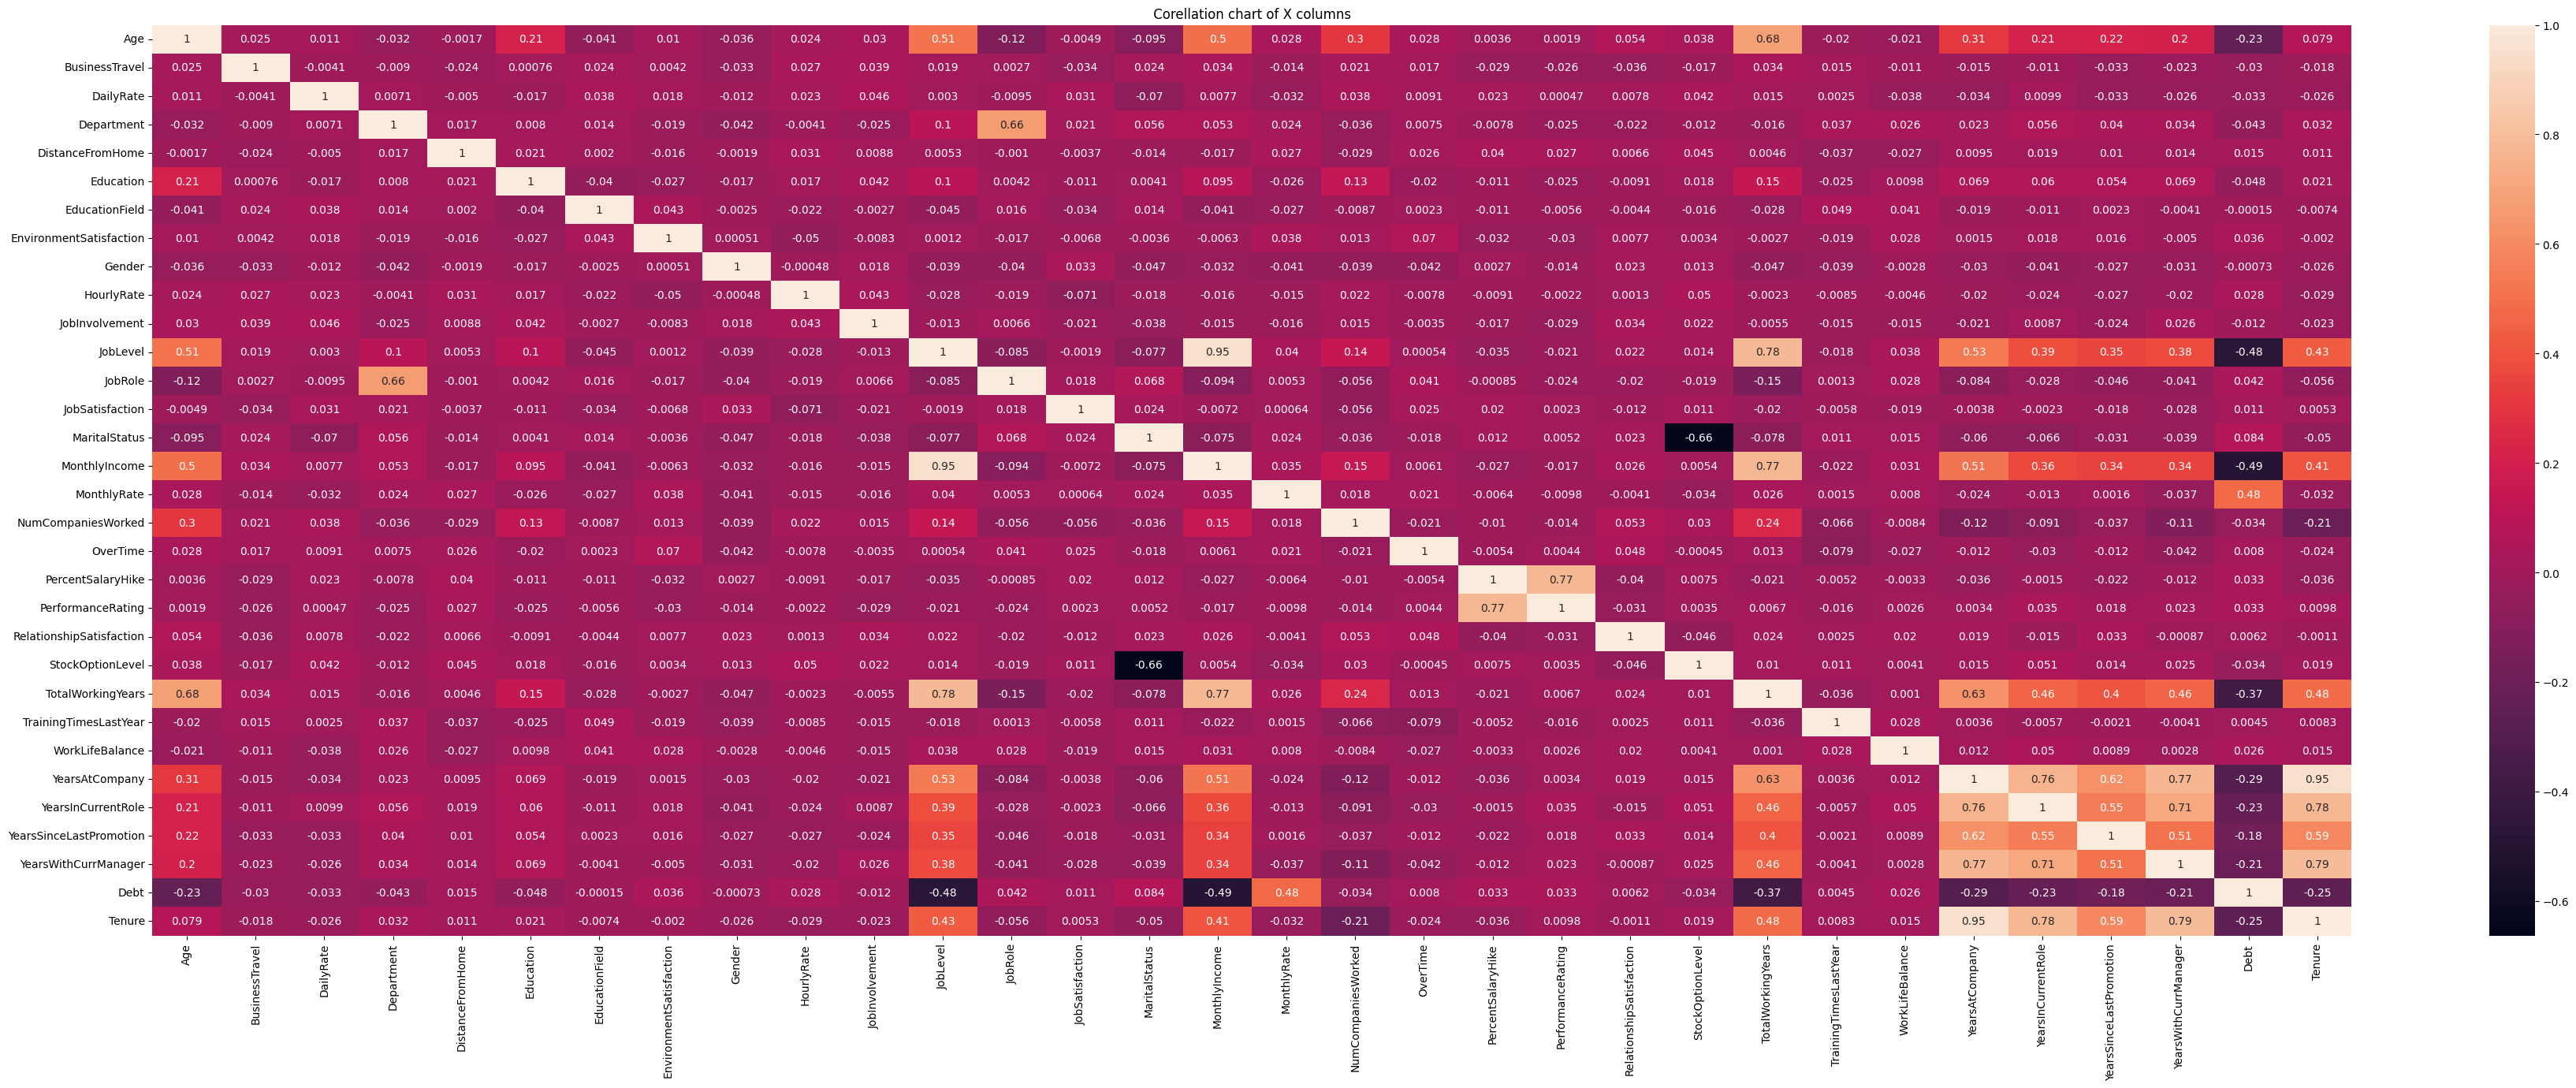

In [55]:
# Get the correlation chart of x columns

plt.figure(figsize = (45, 15))

sns.heatmap(x.corr(), annot = True)

plt.title(' Corellation chart of X columns ')

plt.show()

In [56]:
cor_matrix = x.corr()

correlating = []
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if cor_matrix.iloc[i, j] > 0.7:
            correlating.append((cor_matrix.columns[i], cor_matrix.columns[j], float(cor_matrix.iloc[i, j])))

correlating

[('MonthlyIncome', 'JobLevel', 0.9502999134798473),
 ('PerformanceRating', 'PercentSalaryHike', 0.7735499964012664),
 ('TotalWorkingYears', 'JobLevel', 0.7822078045362748),
 ('TotalWorkingYears', 'MonthlyIncome', 0.7728932462543574),
 ('YearsInCurrentRole', 'YearsAtCompany', 0.7587537366134619),
 ('YearsWithCurrManager', 'YearsAtCompany', 0.7692124251007031),
 ('YearsWithCurrManager', 'YearsInCurrentRole', 0.7143647616385931),
 ('Tenure', 'YearsAtCompany', 0.9493187983062885),
 ('Tenure', 'YearsInCurrentRole', 0.778123241670558),
 ('Tenure', 'YearsWithCurrManager', 0.7928290623923199)]

drop 
- YearsAtCompany
- YearsWithCurrManager
- YearsInCurrentRole

In [57]:
# Define and encode y (Dependent Variable)

y = df['Attrition'].map({ 'Yes': 1, 'No': 0 })

y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

#### Feature Scaling

In [58]:
# Instantiate StandardScaler

SS = StandardScaler()

In [59]:
# Scale x

Scaledx = SS.fit_transform(x)

Scaledx

array([[ 0.4463504 ,  0.59004834,  0.74252653, ...,  0.24583399,
         0.46137976, -0.28644205],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.80654148,
         0.46137976,  0.12024332],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.15593471,
         0.46137976, -1.31717912],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.31487349,
        -2.16741192,  0.2480142 ],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  1.08689522,
         0.46137976, -0.02349892],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.59522723,
         0.46137976, -0.48854736]], shape=(1470, 32))

### Modelling

In [60]:
# Instantiate Train_Test_Split

x_train, x_test, y_train, y_test = train_test_split(Scaledx, y, test_size=0.2, random_state=30)

#### Model Initiation

In [61]:
# Instantiate Logistic Regression

Log = LogisticRegression()

In [62]:
# Instantiate XGBClassifier

Boost = XGBClassifier()

In [63]:
# Instantiate RandomForestClassifier

Forest = RandomForestClassifier(random_state = 30)

#### Training

In [64]:
x_train

array([[ 1.43186707,  0.59004834, -1.20604782, ..., -0.59522723,
         0.46137976, -1.03544432],
       [ 0.4463504 ,  0.59004834,  0.74252653, ...,  0.24583399,
         0.46137976, -0.28644205],
       [-0.32016256, -0.91319439, -0.33092473, ...,  1.36724896,
         0.46137976,  1.3758741 ],
       ...,
       [-0.53916626,  0.59004834, -0.38794408, ...,  0.24583399,
         0.46137976,  0.00345275],
       [-0.75816996,  0.59004834,  0.83177421, ...,  0.80654148,
         0.46137976,  0.79583187],
       [-0.86767181,  0.59004834, -0.97797041, ..., -0.87558097,
         0.46137976, -0.83142947]], shape=(1176, 32))

In [65]:
y_train

539     0
0       1
847     0
518     0
154     0
       ..
919     0
1164    0
500     0
941     0
421     1
Name: Attrition, Length: 1176, dtype: int64

In [66]:
# Training by Logistic Regression

Log.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [67]:
# Training XGBClassifier

Boost.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [68]:
# Training by Random Forest Classifier

Forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Testing

In [69]:
Log_prediction = Log.predict(x_test)

In [70]:
Boost_prediction = Boost.predict(x_test)

In [71]:
Forest_prediction = Forest.predict(x_test)

#### Metrics Evaluation

In [72]:
# Accuracy_Score for Logistic Regression 

accuracy_score(y_test, Log_prediction)

0.8673469387755102

In [73]:
# Accuracy_Score for XGBClassifier

accuracy_score(y_test, Boost_prediction)

0.8639455782312925

In [74]:
# Accuracy_Score for RandomForestClassifier

accuracy_score(y_test, Forest_prediction)

0.8707482993197279

In [75]:
# Check Data balance

print(y.value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


In [76]:
print(str((237/1233)*100) + '%')

19.22141119221411%
